In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
data = pd.read_csv("demographics.csv")

In [2]:
# Cleaning data, droping all the blanks
data = data.dropna()
data

,Member,MB Gender,MB race,Sales,Age
1,Jun Christine Lee,female,Chinese,663.2,5.0
2,JOANNE TSE,female,Chinese,105.37,40.0
3,SHAMINI,female,Indian,28.8,30.0
4,SUE,female,Malay,165.09,41.0
6,ngh3,female,Others,66.37,5.0
...,...,...,...,...,...
46209,lai teck chuan,male,Chinese,478.23,32.0
46210,marcus teo,male,Chinese,297.95,49.0
46211,CECILIA ONG,female,Chinese,"1,105.78",58.0
46212,candy,female,Chinese,83.46,28.0


In [3]:
# Changing string into numerical values (Gender)
data['MB Gender'] = data['MB Gender'].replace({'female':'1', 'male':'0'})

In [4]:
# Changing string into numerical values (Race)
data['MB race'] = data['MB race'].replace({'Chinese':'0', 'Indian':'1', 'Malay':'2', 'Others':'3'})

In [5]:
# Display the data to check if it's right
data

,Member,MB Gender,MB race,Sales,Age
1,Jun Christine Lee,1,0,663.2,5.0
2,JOANNE TSE,1,0,105.37,40.0
3,SHAMINI,1,1,28.8,30.0
4,SUE,1,2,165.09,41.0
6,ngh3,1,3,66.37,5.0
...,...,...,...,...,...
46209,lai teck chuan,0,0,478.23,32.0
46210,marcus teo,0,0,297.95,49.0
46211,CECILIA ONG,1,0,"1,105.78",58.0
46212,candy,1,0,83.46,28.0


In [6]:
# Cleaning age
data.drop(data[data['Age'] < 15].index, inplace = True) 
data.drop(data[data['Age'] > 70].index, inplace = True) 
data

,Member,MB Gender,MB race,Sales,Age
2,JOANNE TSE,1,0,105.37,40.0
3,SHAMINI,1,1,28.8,30.0
4,SUE,1,2,165.09,41.0
7,jacqueline lim,1,0,"1,825.48",37.0
8,GERALDINE A/P DORAISAMY ANTHONY,1,1,"1,516.28",63.0
...,...,...,...,...,...
46209,lai teck chuan,0,0,478.23,32.0
46210,marcus teo,0,0,297.95,49.0
46211,CECILIA ONG,1,0,"1,105.78",58.0
46212,candy,1,0,83.46,28.0


In [7]:
# Creating age custom groups
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

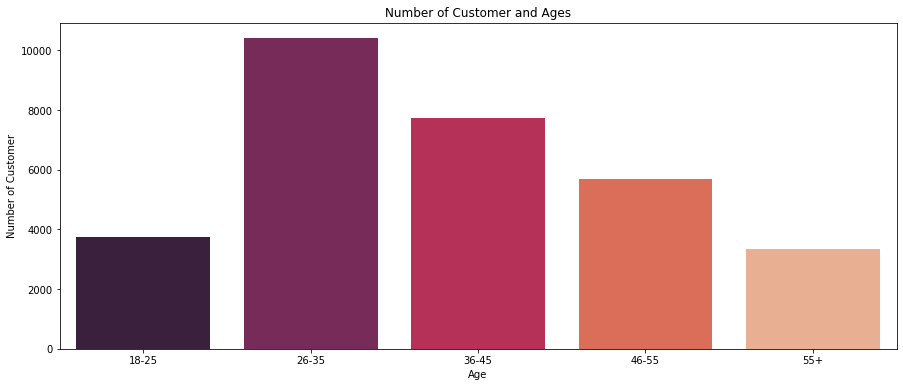

In [8]:
# Plotting age in a graph to show distribution of age
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

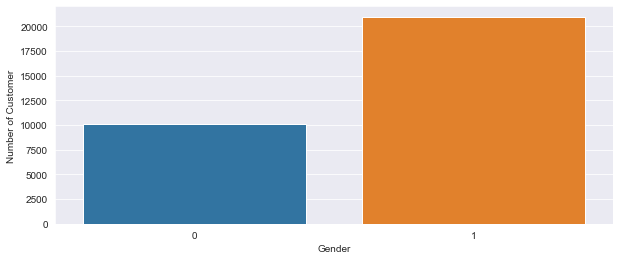

In [9]:
# Plotting gender 
MB_Gender = data['MB Gender'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=MB_Gender.index, y=MB_Gender.values)
plt.xlabel("Gender")
plt.ylabel("Number of Customer")
plt.show()

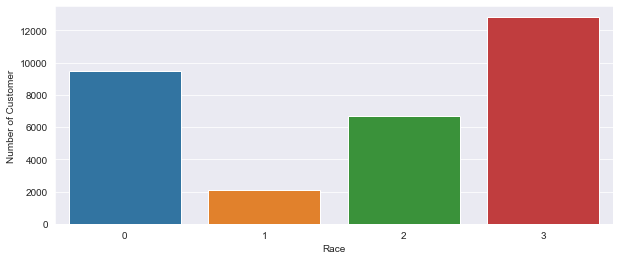

In [10]:
# Plotting race
MB_race = data['MB race'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=MB_race.index, y=MB_race.values)
plt.xlabel("Race")
plt.ylabel("Number of Customer")
plt.show()

In [11]:
# Importing necessary libraries for k-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler 


In [12]:
# Drop Member column, as it is not needed
data=data.drop(['Member'], axis=1)
data

,MB Gender,MB race,Sales,Age
2,1,0,105.37,40.0
3,1,1,28.8,30.0
4,1,2,165.09,41.0
7,1,0,"1,825.48",37.0
8,1,1,"1,516.28",63.0
...,...,...,...,...
46209,0,0,478.23,32.0
46210,0,0,297.95,49.0
46211,1,0,"1,105.78",58.0
46212,1,0,83.46,28.0


In [13]:
# Converting strings to numeric
data['Sales'] = pd.to_numeric(data['Sales'],errors='coerce')

In [14]:
# Scaling the dataset
mms=MinMaxScaler()
mms.fit(data)
data_transformed=mms.transform(data)

In [15]:
data_transformed

array([[1.        , 0.        , 0.5335551 , 0.45454545],
       [1.        , 0.33333333, 0.49363102, 0.27272727],
       [1.        , 0.66666667, 0.56469349, 0.47272727],
       ...,
       [1.        , 0.        ,        nan, 0.78181818],
       [1.        , 0.        , 0.52213109, 0.23636364],
       [0.        , 1.        ,        nan, 0.25454545]])

In [16]:
# Convert to Dataframe
data_transformed=pd.DataFrame(data_transformed, columns=['MB Gender', 'MB race', 'Sales', 'Age' ])
data_transformed

,MB Gender,MB race,Sales,Age
0,1.0,0.000000,0.533555,0.454545
1,1.0,0.333333,0.493631,0.272727
2,1.0,0.666667,0.564693,0.472727
3,1.0,0.000000,NaN,0.400000
4,1.0,0.333333,NaN,0.872727
...,...,...,...,...
31123,0.0,0.000000,0.727967,0.309091
31124,0.0,0.000000,0.633968,0.618182
31125,1.0,0.000000,NaN,0.781818
31126,1.0,0.000000,0.522131,0.236364


<function matplotlib.pyplot.show(*args, **kw)>

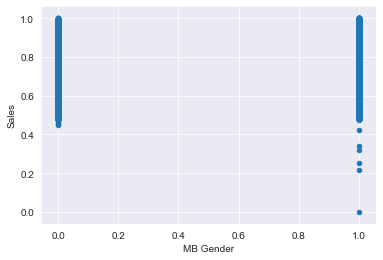

In [17]:
# Plotting dataset after scalling
data_transformed.plot(kind='scatter', x='MB Gender', y='Sales')
plt.show

,pca1,pca2
0,-0.107066,0.647661
1,-0.221603,0.350254
2,-0.342675,0.024555
3,-0.102061,0.669033
4,-0.109558,0.636908
...,...,...
23379,-0.463133,-0.298383
23380,-0.456270,-0.268872
23381,0.830929,0.305074
23382,0.825624,0.282284


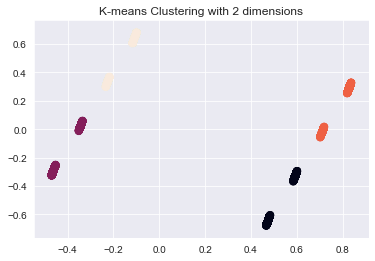

In [18]:
# Remove Nan rows
data_transformed = data_transformed.dropna()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(data_transformed)

from sklearn.decomposition import PCA
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

reduced_data = PCA(n_components=2).fit_transform(data_transformed)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
display(results)
plt.scatter(x="pca1", y="pca2", c= kmeans.labels_.astype(float), s=50, alpha=0.5, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 40, ncost: 67.95622697026943
Run: 1, iteration: 2/100, moves: 6, ncost: 66.89924805731623
Run: 1, iteration: 3/100, moves: 1, ncost: 66.8630077147245
Run: 1, iteration: 4/100, moves: 0, ncost: 66.8630077147245


,pca1,pca2
0,-2.865415,0.296295
1,-2.892047,-0.183785
2,-3.054980,-0.174827
3,-2.920230,-0.331582
4,-2.906852,0.295917
...,...,...
145,2.173075,0.127588
146,1.784888,-0.443191
147,2.005296,0.010566
148,2.134042,0.037797


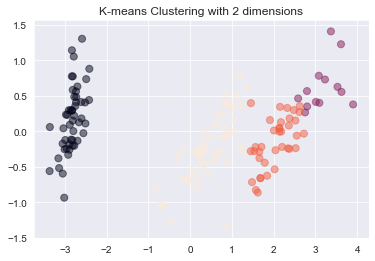

[array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [7.42307692, 3.13076923, 6.26923077, 2.06923077],
       [6.34324324, 2.93243243, 5.31351351, 2.01081081],
       [5.9       , 2.76      , 4.25      , 1.326     ]]), array([[0.],
       [2.],
       [2.],
       [1.]])]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 1 3 1 2 1 2
 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 2 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 2 2]


In [19]:
# using Kprototypes 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from kmodes.kprototypes import KPrototypes

iris = datasets.load_iris()

data = np.c_[iris['data'], iris['target']]

kp = KPrototypes(n_clusters=4, init='Huang', n_init=1, verbose=True)
kp.fit_predict(data, categorical=[4])
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
display(results)
plt.scatter(x="pca1", y="pca2", c= kp.labels_.astype(float), s=50, alpha=0.5, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

print(kp.cluster_centroids_)
print(kp.labels_)

For n_clusters = 2 The average silhouette_score is : 0.6036605937068342
For n_clusters = 3 The average silhouette_score is : 0.7215859425269671
For n_clusters = 4 The average silhouette_score is : 0.7997719635116657
For n_clusters = 5 The average silhouette_score is : 0.8430178413805404
For n_clusters = 6 The average silhouette_score is : 0.8598723379118572
For n_clusters = 7 The average silhouette_score is : 0.9092673975918274
For n_clusters = 8 The average silhouette_score is : 0.9453486118166071
For n_clusters = 9 The average silhouette_score is : 0.8487631881676285


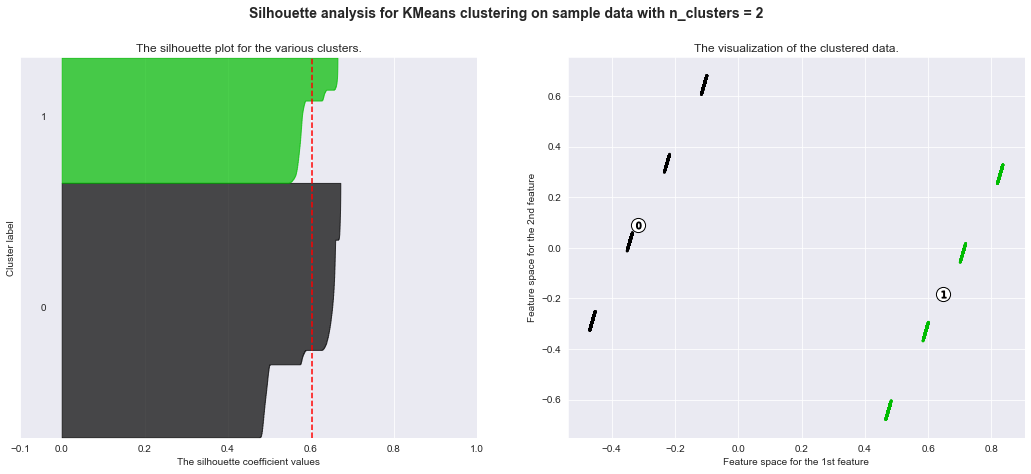

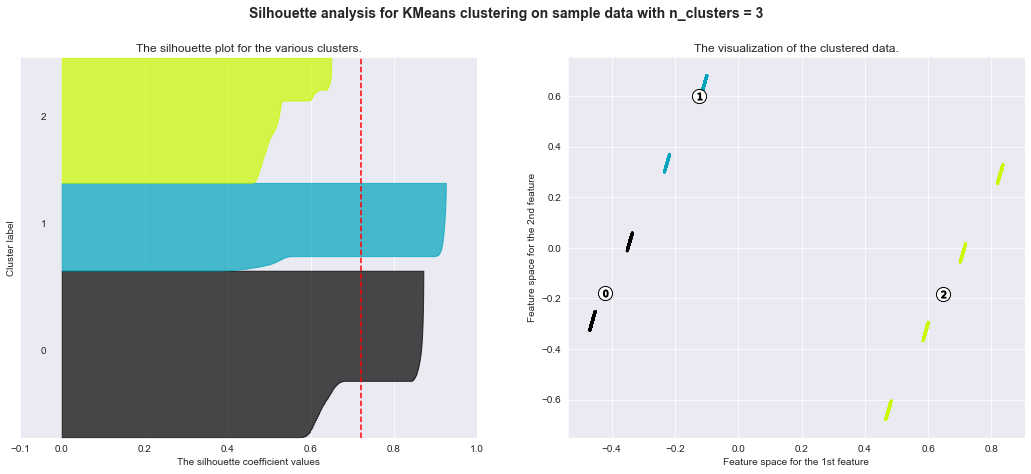

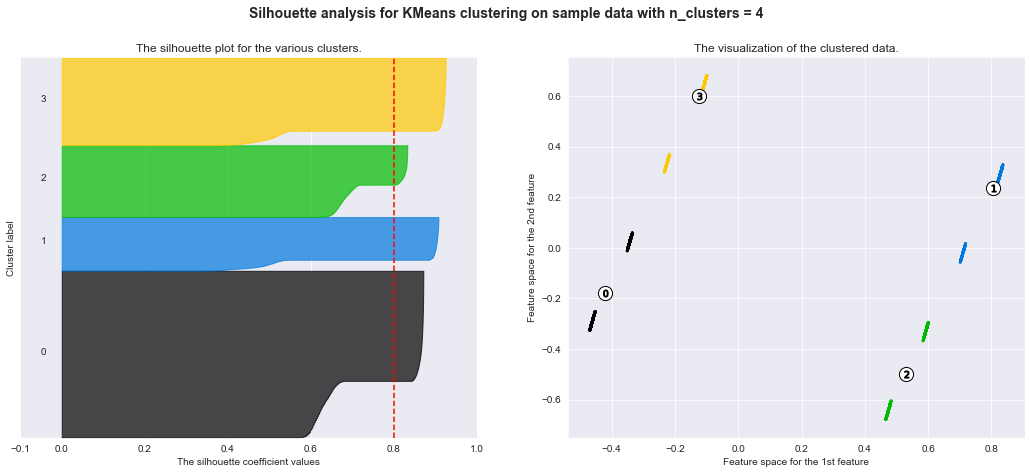

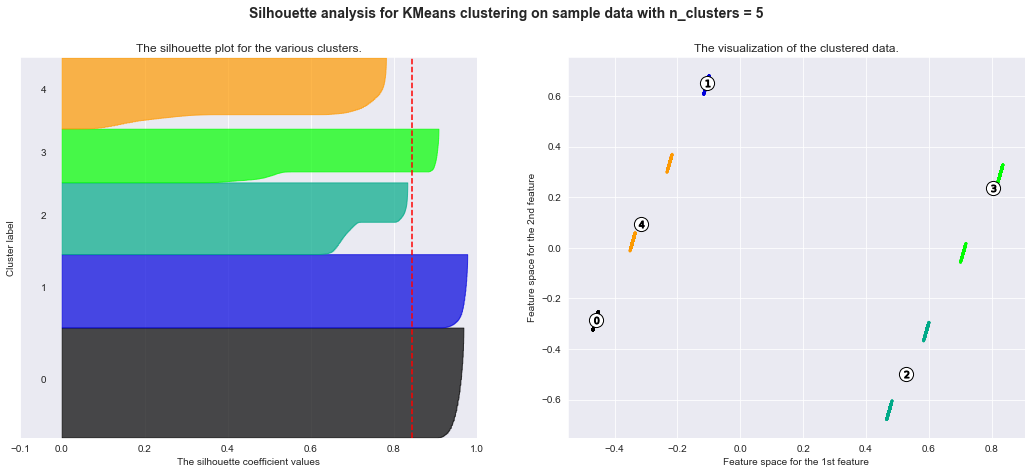

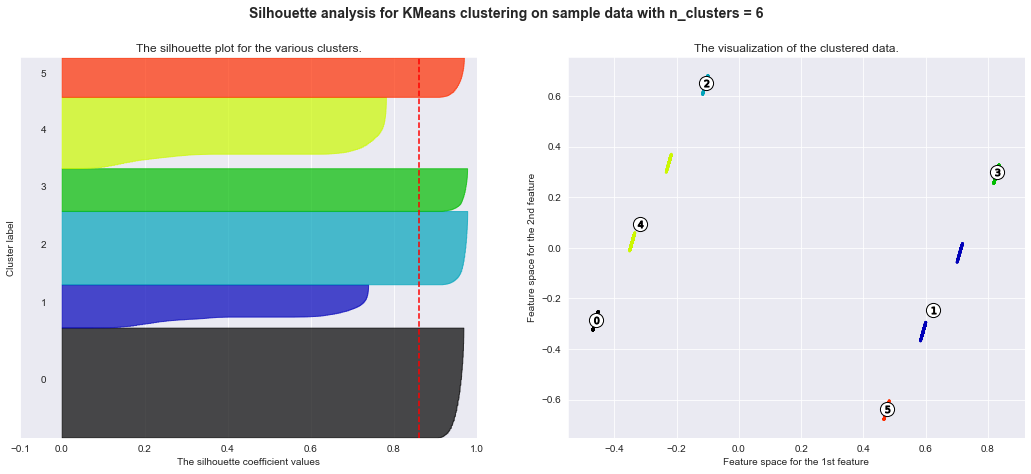

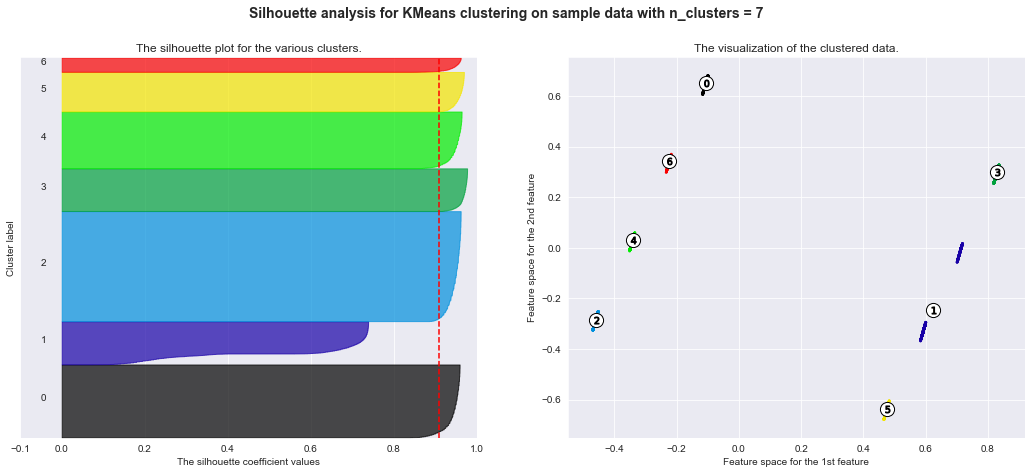

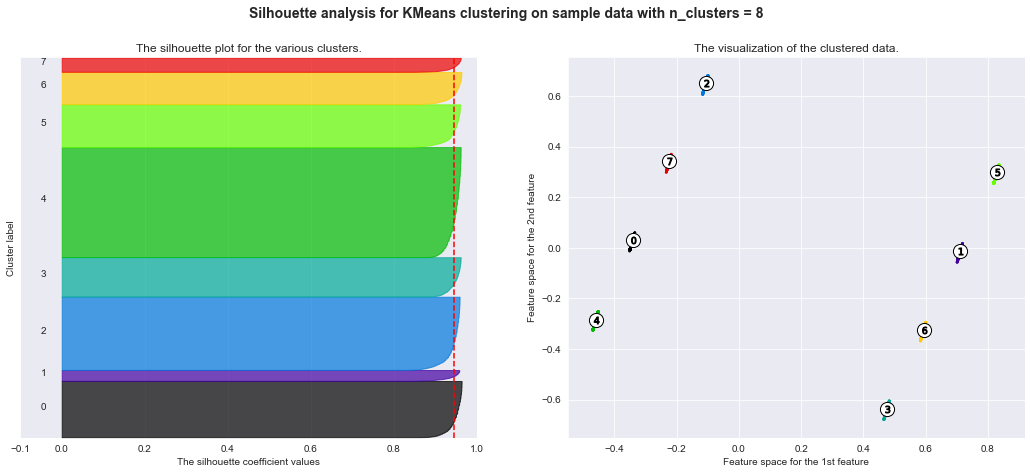

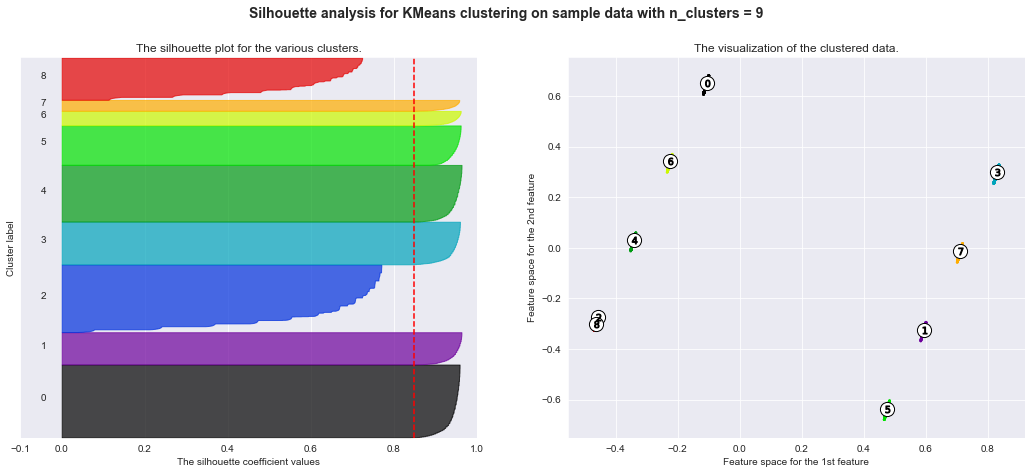

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
# silhouette analysis to choose number of K 
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
X = results
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    reduced_data = PCA(n_components=2).fit_transform(data_transformed)
    results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
    
    ax2.scatter(results["pca1"], results["pca2"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()